<a href="https://colab.research.google.com/github/virf96/Proyectos/blob/master/Heidrick_Prescott.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<pre><strong>US Macroeconomic Dataset 1959 Q1 - 2009 Q3</strong>
Número de observaciones - 203
Número de Variables - 14
Variables:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    


**Filtro de Hodrick Prescott** (Método para descomponer una serie)

Separa una serie de tiempo en dos componentes:

$\bullet$ **Componente de tendencia**

$\bullet$ **Componente de cíclico** (Tendencias sin una repetición establecida)

Es decir para cada $x_{t}=\mu_{t}+c_{t}$ donde $\mu_{t}$ es el componente de **tendencia** y $c_{t}$ es el componente **cíclico**.

Depende de un parámetro $\lambda$ que mide las variaciones en la tasa de crecicimiento del componenetede tendencia. El parámetro es más visible en la función de coste que minimiza el error del método.

La minimización se hace através de una función cuadratica que puede ser visto como un suavizamiento de la función.



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

#Index_col=0, dado que la primera variable del df es una fecha y para visualizar mejor los periodos es conveniente indexarla
#parse_dates_True, para convertir la variable a tipo fecha
df = pd.read_csv('https://raw.githubusercontent.com/virf96/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/macrodata.csv',index_col=0,parse_dates=True)
df.head()

year  quarter   realgdp  realcons  ...  unemp      pop  infl  realint
1959-03-31  1959        1  2710.349    1707.4  ...    5.8  177.146  0.00     0.00
1959-06-30  1959        2  2778.801    1733.7  ...    5.1  177.830  2.34     0.74
1959-09-30  1959        3  2775.488    1751.8  ...    5.3  178.657  2.74     1.09
1959-12-31  1959        4  2785.204    1753.7  ...    5.6  179.386  0.27     4.06
1960-03-31  1960        1  2847.699    1770.5  ...    5.2  180.007  2.31     1.19

[5 rows x 14 columns]

### Gráfico de la serie

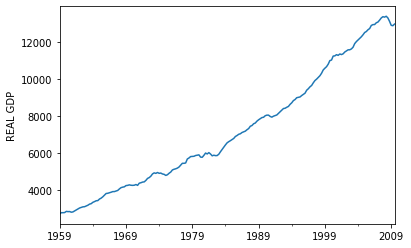

In [6]:
#Analizamos el producto interno bruto
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

# Descomposición aditiva

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


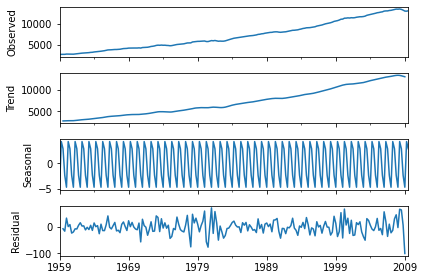

In [7]:
#Podemos observar el componente de tendencia
#Componente de Estacionalidad
#Componente residual
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
s_dec_additive=seasonal_decompose(df['realgdp'],model='additive')
s_dec_additive.plot()
plt.show()

In [8]:
#Para el método Hodrick Prescott "hpfilter" el parámetro "lamb" mide la frecuencia 
#En el caso de que sean trimestres lamb=1600
#En el caso de que sean anuales lamb=6.25
#En el caso de que sean mensuales lamb=129600

#Obtendremos el efecto de tendencia y el efecto cíclico
from statsmodels.tsa.filters.hp_filter import hpfilter
#Efecto por separado para la tendencia y el componente cíclico
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [9]:
#Añadimos el componente de tendencia
df['trend'] = gdp_trend

In [10]:
df.head()

year  quarter   realgdp  ...  infl  realint        trend
1959-03-31  1959        1  2710.349  ...  0.00     0.00  2670.837085
1959-06-30  1959        2  2778.801  ...  2.34     0.74  2698.712468
1959-09-30  1959        3  2775.488  ...  2.74     1.09  2726.612545
1959-12-31  1959        4  2785.204  ...  0.27     4.06  2754.612067
1960-03-31  1960        1  2847.699  ...  2.31     1.19  2782.816333

[5 rows x 15 columns]

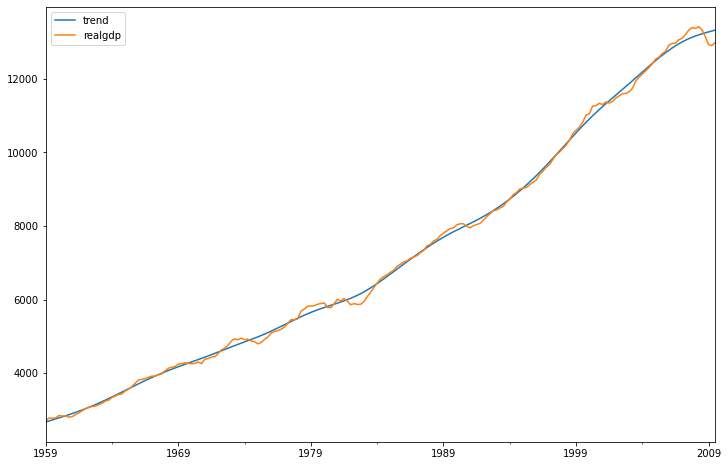

In [11]:
#Visuaizamos la tendencia del producto interno bruto y el producto interno bruto
df[['trend','realgdp']].plot(figsize=(12,8))

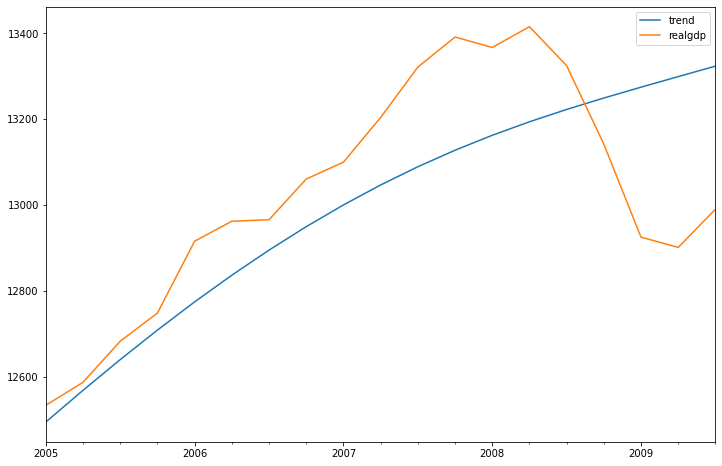

In [12]:
#Analizamos los periodos en donde los datos reales estan por debajo o por encima de la tendencia general
#En este caso analizaremos que paso al rededor de la gran recesión 
#Como la recesión fue en el 2008, analizaremos a partir del 2005
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,8))
#Observamos como la recesión empezo a golpear a partir del 2008